# Data Visualizations

This notebook shows some visualizations of the data used in the causal model.
- Traversal temperature
- NDVI
- Albedo
- NLCD

In [6]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from matplotlib.colors import ListedColormap

import rasterio as rio
import cartopy.crs as ccrs
import geopandas as gpd

In [10]:
# Read data from files
temp = gpd.read_file('..\data\Traversal\Boston_ev.shp')
print(temp)
tif_ndvi = "..\data\Boston\Boston_ndvi.tif"
with rio.open(tif_ndvi) as src:
    ndvi = src.read(1)
    # print(np.flipud(ndvi))
    bounds = src.bounds
    crs = src.crs

tif_albedo = "..\data\Boston\Boston_albedo.tif"
with rio.open(tif_albedo) as src:
    albedo = src.read(1)
    bounds = src.bounds
    crs = src.crs

tif_nlcd = '../data/boston/boston_nlcd.tif'
with rio.open(tif_nlcd) as src:
    nlcd = src.read(1)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\esl26\AppData\Local\Temp\ipykernel_3356\3351523896.py:2: SyntaxWarning: invalid escape sequence '\d'
  temp = gpd.read_file('..\data\Traversal\Boston_ev.shp')
C:\Users\esl26\AppData\Local\Temp\ipykernel_3356\3351523896.py:4: SyntaxWarning: invalid escape sequence '\d'
  tif_ndvi = "..\data\Boston\Boston_ndvi.tif"
C:\Users\esl26\AppData\Local\Temp\ipykernel_3356\3351523896.py:11: SyntaxWarning: invalid escape sequence '\d'
  tif_albedo = "..\data\Boston\Boston_albedo.tif"


             lat       long    time_n  speed   T_C    RH    T_F  case  \
0      42.284805 -71.064607  230004.0  15.10  29.9  58.7  85.82     2   
1      42.284842 -71.064572  230005.0  21.43  29.9  58.7  85.82     2   
2      42.284887 -71.064543  230006.0  22.94  29.9  58.7  85.82     2   
3      42.284937 -71.064522  230007.0  22.81  29.9  58.8  85.82     2   
4      42.284987 -71.064503  230008.0  22.81  29.9  58.8  85.82     2   
...          ...        ...       ...    ...   ...   ...    ...   ...   
20242  42.325347 -71.120802  234015.0  26.22  28.6  64.7  83.48     2   
20243  42.325293 -71.120838  234016.0  26.22  28.6  64.8  83.48     2   
20244  42.325252 -71.120880  234017.0  18.06  28.6  64.8  83.48     2   
20245  42.325222 -71.120920  234018.0  13.87  28.6  64.9  83.48     2   
20246  42.325195 -71.120950  234019.0   9.76  28.6  64.9  83.48     2   

            HI_F       HI_C                    geometry  
0      90.307220  32.392900  POINT (-71.06461 42.28480)  
1      

## Traversal temperature

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


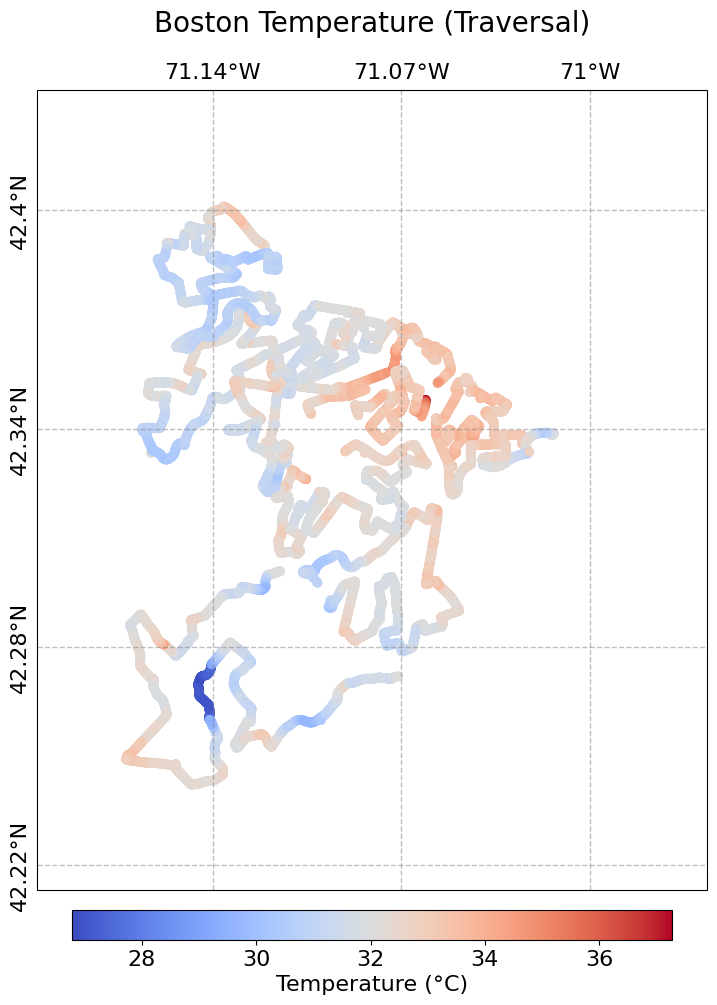

In [94]:
# First, visualize the temperature dataset

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})

# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])

# Convert from EPSG: 4326 to EPSG: 3857
temp = temp.to_crs(epsg=3857)

# Scatter plot
ig = ax.scatter(temp.geometry.x, temp.geometry.y, c=(temp['HI_C']),cmap='coolwarm')

# Colorbar at the bottom
cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.03])
cbar = fig.colorbar(ig, cax=cbar_ax, orientation='horizontal')#, pad=0.05, shrink=0.8)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_xlabel('Temperature (°C)',fontsize=16)
ax.set_xlim(bounds.left, bounds.right)
ax.set_ylim(bounds.bottom, bounds.top)

fig.suptitle('Boston Temperature (Traversal)', fontsize=20)

# Save the figure
plt.savefig('./figures/boston_temp.png', dpi=300, bbox_inches='tight')
plt.show()

### Temperature vs. Sensor Speed

I was wondering if there was a correlation between the two variables.

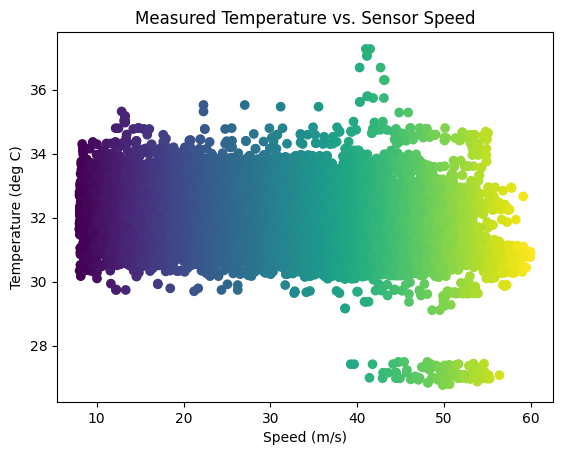

In [95]:
# Plot temperature against speed of sensor at the time of measurement
x = temp['speed']
y = temp['HI_C']
plt.scatter(x,y, c=x, cmap='viridis', marker = 'o')
plt.title('Measured Temperature vs. Sensor Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Temperature (deg C)')
plt.show()

## NDVI

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


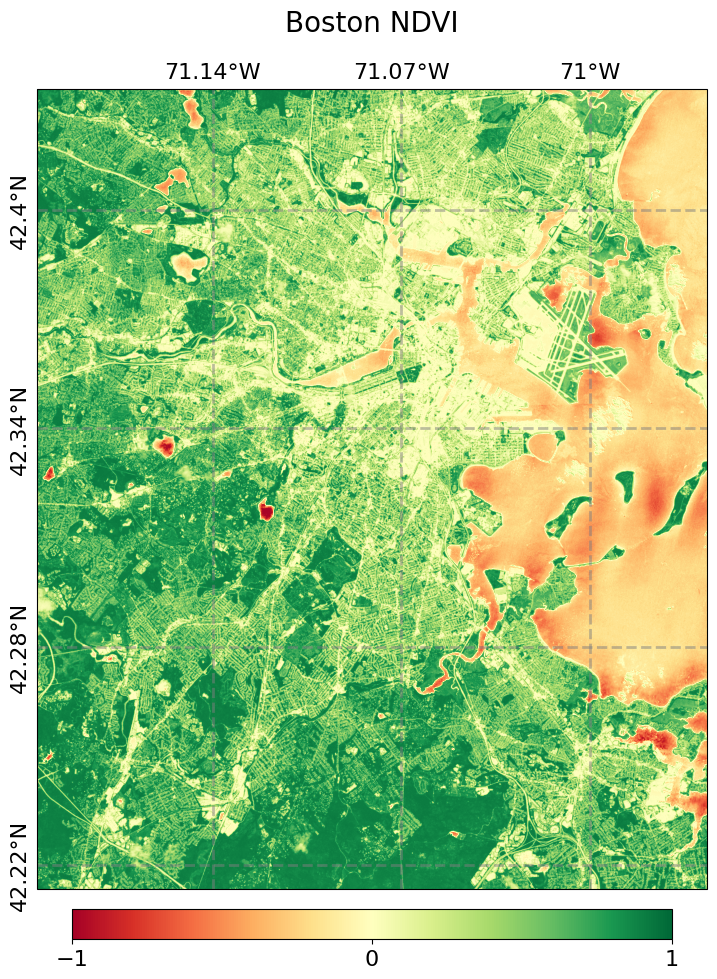

In [99]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Set fixed locator values for gridlines
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])
img = ax.imshow(ndvi, cmap='RdYlGn', extent=img_extent, vmax=1, vmin=-1)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.03])
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', pad=0.05, ticks=[-1, 0, 1])
cbar.ax.tick_params(labelsize=16)

fig.suptitle('Boston NDVI', fontsize=20)

# cbar.ax.set_xlabel('NDVI', fontsize=24)
plt.savefig('./figures/boston_ndvi.png', dpi=300, bbox_inches='tight')

## Albedo

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


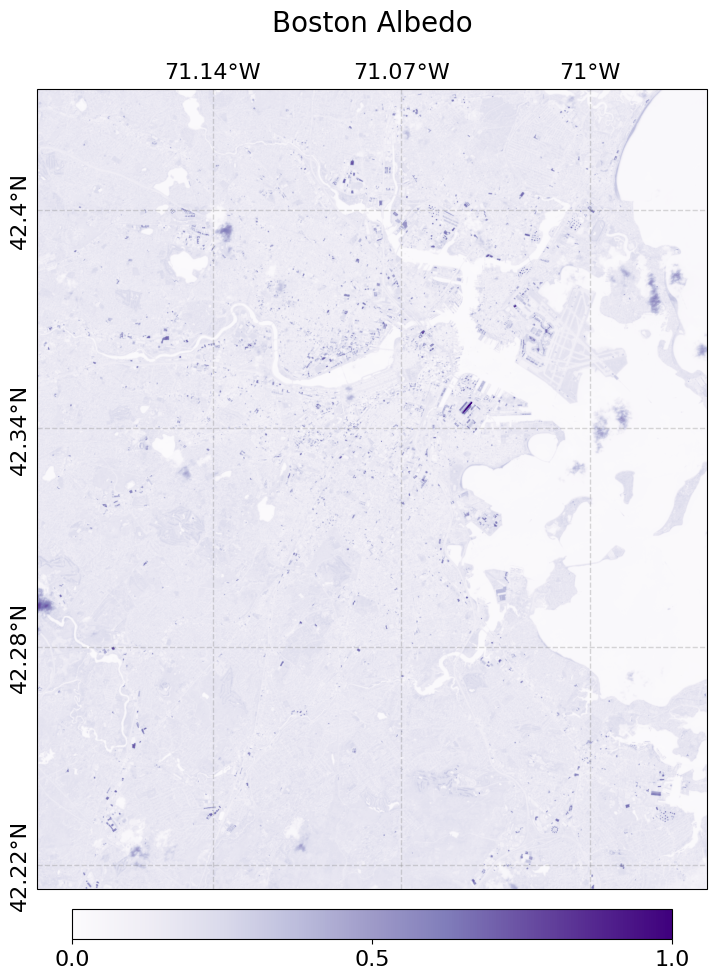

In [5]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})

# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])

img = ax.imshow(albedo, cmap='Purples', extent=img_extent, vmin=0, vmax=1)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.03])
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[0, 0.5, 1])
cbar.ax.tick_params(labelsize=16)

fig.suptitle('Boston Albedo', fontsize=20)


plt.savefig('../figures/boston_albedo.png', dpi=300, bbox_inches='tight')
# plt.show()

## NLCD

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


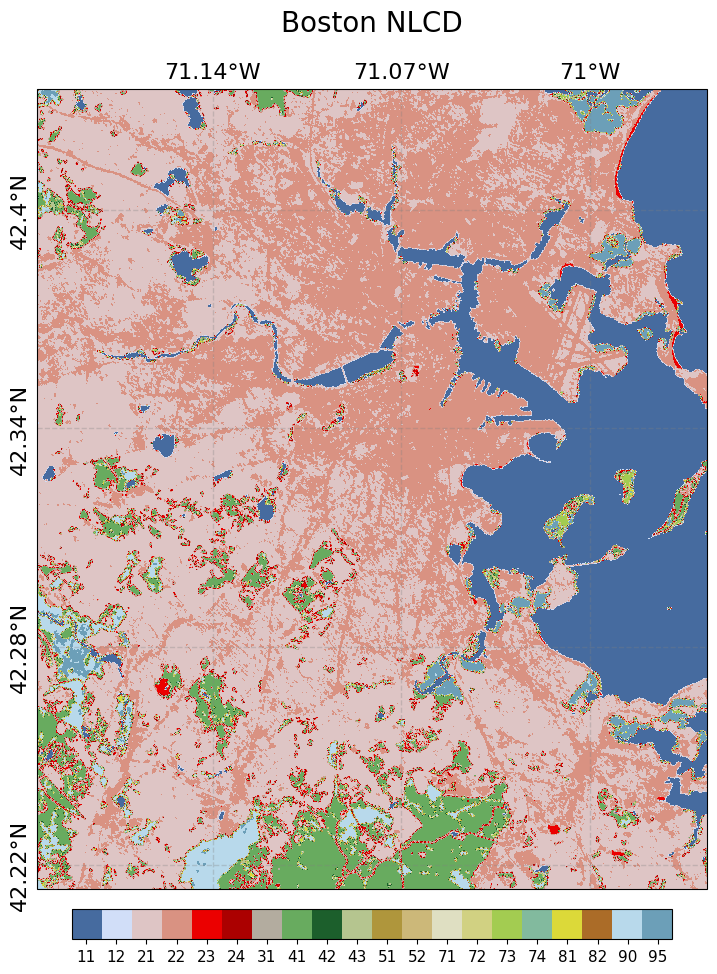

In [11]:
fig = plt.figure(figsize=(10,10))

# Plot the raster data
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})

# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])

# Define your specific values and corresponding colors
value_color_mapping = {
    11: '#466b9f',
    12: '#d1def8',
    21: '#dec5c5',
    22: '#d99282',
    23: '#eb0000',
    24: '#ab0000',
    31: '#b3ac9f',
    41: '#68ab5f',
    42: '#1c5f2c',
    43: '#b5c58f',
    51: '#af963c',
    52: '#ccb879',
    71: '#dfdfc2',
    72: '#d1d182',
    73: '#a3cc51',
    74: '#82ba9e',
    81: '#dcd939',
    82: '#ab6c28',
    90: '#b8d9eb',
    95: '#6c9fb8'
}

# Create the custom colormap
nlcd_cmap = ListedColormap([value_color_mapping[value] for value in sorted(value_color_mapping.keys())])

img = plt.imshow(nlcd, extent=img_extent, cmap=nlcd_cmap)
# Plot the points on top
temp = temp.to_crs(epsg=3857)
# plt.scatter(temp.geometry.x, temp.geometry.y, c='r', s=1)
cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.03])
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', pad=0.05, shrink=0.8, )

tick_positions = np.linspace(13,93,20)
tick_labels = [11, 12, 21, 22, 23, 24, 31, 41, 42, 43, 51, 52, 71, 72, 73, 74, 81, 82, 90, 95]

cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(labelsize=11)

fig.suptitle('Boston NLCD', fontsize=20)


plt.savefig('../figures/boston_nlcd.png', dpi=300, bbox_inches='tight')
# plt.show()